# Projet DeepLearning

**N'Siemo Norayda ;
 Mane Ismaïl ; 
 Sow Alpha ;
 Amia Mounir**

In [1]:
# Import librairies
#import tensorflow as tf
from tensorflow import keras #
import matplotlib.pyplot as plt

"""" 
    from sklearn.preprocessing import StandardScaler On a essayé de normaliser nos données avec standardscaler()
    mais étant donné qu'avec les couches convnets on a besoin de nos données sous la forme de matrices, 
    il nous était impossible de l'utiliser
""""

Grâce à Tensorflow, l'outil open source d'apprentissage automatique développé par Google et Keras, la bibliothèque open source écrite en Python, nous allons aujourd'hui analyser le dataset CIFAR-10.

Le dataset Cifar10 est composé de 60000 images de (32,32) il est réparti en 10 catégories. Chaque image est représenté par une matrice de valeurs numérique représentant les nuances de couleurs comprises entre 0 à 255.
Un modèle dit de Deep Learning regroupe plusieurs opérations qui nous permettent de faire des prédictions.
Pour effectuer notre analyse nous allons entrainer différents modèles : le modèle linéaire, le perceptron multi-couche et le convnets.
Le but des modèles est de deviner à quelle catégorie une image appartient avec le plus d'exactitude possible. Les tests seront effectué sur un nouveau jeux de données déja compris dans cifar10(test_image_input, test_image_ettiqt).


Après avoir importer les bibliotèques nécessaires, on écrit les différentes fonctions qu'on utiiseras:

_**plot_all_logs**_ : affiche les graphes de comparaisons du loss et de l'accuracy de tous les modèles avec la légende.

_**add_layers_linear**_ : ajoute les couches pour le modèle linéaire.

_**add_layers_pcm**_ : ajoute les couches pour le modèle perceptron linéaire.

_**add_layers_convnets**_ : ajoute les couches pour le modèle Convnets.

_**build_train_and_model**_ : complète le modèle avec la dernière couches et compile ce dernier avant de le lancer avec un nombre époques nbEpochs.

In [24]:
#Pour l'affichage
def plot_all_logs(all_logs):
    # Loss
    for logs in all_logs:
        y_coords = logs[0].history["loss"]
        x_coords = list(range(len(y_coords)))
        plt.plot(x_coords, y_coords,label=logs[1])
        plt.legend()
        plt.title("Loss")

    plt.show()
    
        # accuracy
    for logs in all_logs:
        y_coords = logs[0].history["categorical_accuracy"]
        x_coords = list(range(len(y_coords)))
        plt.plot(x_coords, y_coords,label=logs[1])
        plt.legend()
        plt.title("Accuracy")
        
    plt.show()


In [9]:
def build_and_train_model(build_layers , x_train, y_train, x_test, y_test,batch_nb,epok):
    model = keras.models.Sequential()
    
    build_layers(model)
        
    #model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(10, activation="softmax"))

    model.compile(
        loss=keras.losses.mse,  # calcul l'erreur
        optimizer=keras.optimizers.SGD(learning_rate),  # minimise l'erreur
        # optimizer=keras.optimizers.Adam()
        metrics=keras.metrics.categorical_accuracy
    )
    
    logs = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epok, batch_size = batch_nb)
    model.summary()
    
    score = model.evaluate(x_test, y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])

    return logs


Le modèle linéaire possède une couche linéaire (layer.Dense). La création du modèle linéaire se fait dans la fonction  _**add_layers_linear**_. Elle ne possède que le Flatten qui converti l'image en vecteur car ceci est essentiel pour le calcul du modèle. 

In [4]:
def add_layers_linear(model:keras.models.Sequential) :
    model.add(keras.layers.Flatten())

Le modèle perceptron multi-couche(PMC) possède plusieurs couches linéaire(layer.Dense).La création du modèle PMC se fait dans la fonction _**add_layers_pcm**_. Nous avons choisis de les répartir par ordre décroissant pour optimiser les résultats.Chaque couche a pour fonction d'activation "relu"(rectified linear unit)qui est la fonction d'activation des couches linéaires.


In [5]:
def add_layers_pmc(model:keras.models.Sequential) :
    #cette fonction ajoute les layers qui correspondent à un perceptron multicouche choix arbitraire du nombres de neuronne
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation=keras.activations.relu))
    model.add(keras.layers.Dense(32, activation=keras.activations.relu))
    model.add(keras.layers.Dense(16, activation=keras.activations.relu))

    model.add(keras.layers.Flatten())

le réseau neuronal convolutifs (ConvNets) possède plusieurs couches de convolutions.La création du modèle Convnets se fait dans la fonction _**add_layers_convnets**_.Nous avons choisis 16 filtres par couche parcequ'au-dela, le calcul devenait beaucoup plus lent.
Le Dropout prévient de l'overfitting et permet une acceleration de l'apprentissage, c'est la raison pour laquelle nous l'avons utilisé.

In [6]:
def add_layers_convnets(model:keras.models.Sequential):
    
    model.add(keras.layers.Conv2D(16, (3, 3), padding="same", activation=keras.activations.relu))
    model.add(keras.layers.MaxPool2D())

    model.add(keras.layers.Conv2D(16, (3, 3), padding="same", activation=keras.activations.relu))
    model.add(keras.layers.MaxPool2D())
    
    model.add(keras.layers.Conv2D(16, (3, 3), padding="same", activation=keras.activations.relu))
    model.add(keras.layers.MaxPool2D())
    
    model.add(keras.layers.Dropout(0.5))
    
    


In [10]:

if __name__ == "__main__":
    # Recuperation de notre DataSet d'entrainement dans des tableaux suivant :
    # image_inPut  --> Tableau de nos images d'entrainement
    # image_ettiqt --> Tableau des ettiquettes de nos images [0,1,2,3,4,5,6,7,8,9]
    (image_input, image_ettiqt), (test_image_input, test_image_ettiqt) = tf.keras.datasets.cifar10.load_data()


    # Transformer les ettiquettes des images en un vecteur de valeur 0 ou 1 ----> [0, 0, 0, 1, 0, ..]
    image_ettiqt = keras.utils.to_categorical(image_ettiqt, 10)
    test_image_ettiqt = keras.utils.to_categorical(test_image_ettiqt, 10)

    # Normaliser nos donnees (reduire les pixelles de nos images pour etre proche de 0)   
    image_input = image_input / 255.0
    test_image_input = test_image_input / 255.0

    
    
    learning_rate = 0.01
    epok = 50
    nbBatch=500
    all_logs = [
        (build_and_train_model(add_layers_convnets,image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle perceptron multi-couche")
    ]
    learning_rate = 0.03
    nbBatch=500
    
    all_logs1 = [
        (build_and_train_model(add_layers_convnets, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle perceptron multi-couche")
    ]
    learning_rate = 1
    nbBatch=500
    all_logs2 = [
        (build_and_train_model(add_layers_convnets, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle perceptron multi-couche")
    ]

    learning_rate = 5
    nbBatch = 500
    all_logs3 = [
        (build_and_train_model(add_layers_convnets, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle perceptron multi-couche")
    ]

    learning_rate = 0.95
    nbBatch = 500
    all_logs4 = [
        (build_and_train_model(add_layers_convnets, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle perceptron multi-couche")
    ]
    
    learning_rate = 0.95
    nbBatch = 300
    all_logs5 = [
        (build_and_train_model(add_layers_convnets, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle perceptron multi-couche")
    ]
 
    learning_rate = 0.95
    nbBatch = 10
    all_logs6 = [
        (build_and_train_model(add_layers_convnets, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle perceptron multi-couche")
    ]

    learning_rate = 0.95
    nbBatch = 100
    all_logs7 = [
        (build_and_train_model(add_layers_convnets, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle perceptron multi-couche")
    ]

    learning_rate = 0.95
    nbBatch = 100
    all_logs8 = [
        (build_and_train_model(add_layers_convnets, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle perceptron multi-couche")
    ]
    
    learning_rate = 0.95
    nbBatch=1024
    all_logs9 = [
        (build_and_train_model(add_layers_convnets, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle ConvNets"),
        (build_and_train_model(add_layers_linear, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle linéaire"),
        (build_and_train_model(add_layers_pmc, image_input , image_ettiqt , test_image_input , test_image_ettiqt,nbBatch,epok),"modèle perceptron multi-couche")
    ]

Epoch 1/50
50/50 [==============================] - 30s 608ms/step - loss: 0.0921 - categorical_accuracy: 0.0960 - val_loss: 0.0910 - val_categorical_accuracy: 0.0936
Epoch 2/50
50/50 [==============================] - 34s 683ms/step - loss: 0.0918 - categorical_accuracy: 0.0948 - val_loss: 0.0909 - val_categorical_accuracy: 0.0905
Epoch 3/50
50/50 [==============================] - 37s 739ms/step - loss: 0.0916 - categorical_accuracy: 0.0943 - val_loss: 0.0907 - val_categorical_accuracy: 0.0849
Epoch 4/50
50/50 [==============================] - 34s 683ms/step - loss: 0.0914 - categorical_accuracy: 0.0921 - val_loss: 0.0906 - val_categorical_accuracy: 0.0810
Epoch 5/50
50/50 [==============================] - 34s 683ms/step - loss: 0.0912 - categorical_accuracy: 0.0917 - val_loss: 0.0906 - val_categorical_accuracy: 0.0780
Epoch 6/50
50/50 [==============================] - 34s 686ms/step - loss: 0.0911 - categorical_accuracy: 0.0935 - val_loss: 0.0905 - val_categorical_accuracy: 0.076

Epoch 50/50
50/50 [==============================] - 46s 915ms/step - loss: 0.0901 - categorical_accuracy: 0.0999 - val_loss: 0.0900 - val_categorical_accuracy: 0.1034
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (1000, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (1000, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (1000, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (1000, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (1000, 8, 8, 16)          4624      
_________________________________________________________________
max_pooling2d_2 (M

Epoch 40/50
50/50 [==============================] - 1s 30ms/step - loss: 0.0856 - categorical_accuracy: 0.2378 - val_loss: 0.0855 - val_categorical_accuracy: 0.2389
Epoch 41/50
50/50 [==============================] - 1s 24ms/step - loss: 0.0855 - categorical_accuracy: 0.2390 - val_loss: 0.0854 - val_categorical_accuracy: 0.2401
Epoch 42/50
50/50 [==============================] - 1s 21ms/step - loss: 0.0855 - categorical_accuracy: 0.2401 - val_loss: 0.0854 - val_categorical_accuracy: 0.2411
Epoch 43/50
50/50 [==============================] - 1s 25ms/step - loss: 0.0854 - categorical_accuracy: 0.2412 - val_loss: 0.0853 - val_categorical_accuracy: 0.2430
Epoch 44/50
50/50 [==============================] - 1s 26ms/step - loss: 0.0853 - categorical_accuracy: 0.2422 - val_loss: 0.0852 - val_categorical_accuracy: 0.2433
Epoch 45/50
50/50 [==============================] - 1s 23ms/step - loss: 0.0852 - categorical_accuracy: 0.2432 - val_loss: 0.0851 - val_categorical_accuracy: 0.2444
Epoc

50/50 [==============================] - 2s 38ms/step - loss: 0.0889 - categorical_accuracy: 0.1651 - val_loss: 0.0889 - val_categorical_accuracy: 0.1734
Epoch 35/50
50/50 [==============================] - 2s 36ms/step - loss: 0.0889 - categorical_accuracy: 0.1652 - val_loss: 0.0888 - val_categorical_accuracy: 0.1742
Epoch 36/50
50/50 [==============================] - 2s 33ms/step - loss: 0.0889 - categorical_accuracy: 0.1659 - val_loss: 0.0888 - val_categorical_accuracy: 0.1747
Epoch 37/50
50/50 [==============================] - 2s 38ms/step - loss: 0.0888 - categorical_accuracy: 0.1665 - val_loss: 0.0888 - val_categorical_accuracy: 0.1758
Epoch 38/50
50/50 [==============================] - 2s 34ms/step - loss: 0.0888 - categorical_accuracy: 0.1666 - val_loss: 0.0887 - val_categorical_accuracy: 0.1761
Epoch 39/50
50/50 [==============================] - 2s 32ms/step - loss: 0.0888 - categorical_accuracy: 0.1668 - val_loss: 0.0887 - val_categorical_accuracy: 0.1763
Epoch 40/50
50/5

Epoch 25/50
100/100 [==============================] - 40s 403ms/step - loss: 0.0897 - categorical_accuracy: 0.1270 - val_loss: 0.0897 - val_categorical_accuracy: 0.1514
Epoch 26/50
100/100 [==============================] - 39s 388ms/step - loss: 0.0897 - categorical_accuracy: 0.1293 - val_loss: 0.0897 - val_categorical_accuracy: 0.1518
Epoch 27/50
100/100 [==============================] - 40s 403ms/step - loss: 0.0897 - categorical_accuracy: 0.1272 - val_loss: 0.0896 - val_categorical_accuracy: 0.1542
Epoch 28/50
100/100 [==============================] - 42s 417ms/step - loss: 0.0897 - categorical_accuracy: 0.1277 - val_loss: 0.0896 - val_categorical_accuracy: 0.1567
Epoch 29/50
100/100 [==============================] - 39s 389ms/step - loss: 0.0897 - categorical_accuracy: 0.1299 - val_loss: 0.0896 - val_categorical_accuracy: 0.1544
Epoch 30/50
100/100 [==============================] - 38s 385ms/step - loss: 0.0897 - categorical_accuracy: 0.1283 - val_loss: 0.0896 - val_categoric

Epoch 14/50
100/100 [==============================] - 1s 13ms/step - loss: 0.0834 - categorical_accuracy: 0.2877 - val_loss: 0.0832 - val_categorical_accuracy: 0.2928
Epoch 15/50
100/100 [==============================] - 1s 13ms/step - loss: 0.0831 - categorical_accuracy: 0.2939 - val_loss: 0.0830 - val_categorical_accuracy: 0.2936
Epoch 16/50
100/100 [==============================] - 2s 15ms/step - loss: 0.0829 - categorical_accuracy: 0.2963 - val_loss: 0.0828 - val_categorical_accuracy: 0.2985
Epoch 17/50
100/100 [==============================] - 1s 13ms/step - loss: 0.0826 - categorical_accuracy: 0.3003 - val_loss: 0.0825 - val_categorical_accuracy: 0.3039
Epoch 18/50
100/100 [==============================] - 1s 13ms/step - loss: 0.0824 - categorical_accuracy: 0.3059 - val_loss: 0.0823 - val_categorical_accuracy: 0.3048
Epoch 19/50
100/100 [==============================] - 1s 13ms/step - loss: 0.0822 - categorical_accuracy: 0.3087 - val_loss: 0.0821 - val_categorical_accuracy:

Epoch 8/50
100/100 [==============================] - 2s 15ms/step - loss: 0.0890 - categorical_accuracy: 0.1607 - val_loss: 0.0890 - val_categorical_accuracy: 0.1591
Epoch 9/50
100/100 [==============================] - 2s 15ms/step - loss: 0.0889 - categorical_accuracy: 0.1642 - val_loss: 0.0889 - val_categorical_accuracy: 0.1636
Epoch 10/50
100/100 [==============================] - 1s 15ms/step - loss: 0.0888 - categorical_accuracy: 0.1680 - val_loss: 0.0887 - val_categorical_accuracy: 0.1655
Epoch 11/50
100/100 [==============================] - 2s 15ms/step - loss: 0.0886 - categorical_accuracy: 0.1702 - val_loss: 0.0886 - val_categorical_accuracy: 0.1694
Epoch 12/50
100/100 [==============================] - 2s 15ms/step - loss: 0.0885 - categorical_accuracy: 0.1736 - val_loss: 0.0884 - val_categorical_accuracy: 0.1739
Epoch 13/50
100/100 [==============================] - 2s 15ms/step - loss: 0.0883 - categorical_accuracy: 0.1774 - val_loss: 0.0883 - val_categorical_accuracy: 0

Test loss: 0.08206120133399963
Test accuracy: 0.2985999882221222
Epoch 1/50
100/100 [==============================] - 39s 389ms/step - loss: 0.0898 - categorical_accuracy: 0.1302 - val_loss: 0.0895 - val_categorical_accuracy: 0.1788
Epoch 2/50
100/100 [==============================] - 42s 416ms/step - loss: 0.0892 - categorical_accuracy: 0.1585 - val_loss: 0.0884 - val_categorical_accuracy: 0.1998
Epoch 3/50
100/100 [==============================] - 38s 383ms/step - loss: 0.0879 - categorical_accuracy: 0.1841 - val_loss: 0.0864 - val_categorical_accuracy: 0.2301
Epoch 4/50
100/100 [==============================] - 43s 433ms/step - loss: 0.0867 - categorical_accuracy: 0.2035 - val_loss: 0.0855 - val_categorical_accuracy: 0.2414
Epoch 5/50
100/100 [==============================] - 37s 374ms/step - loss: 0.0859 - categorical_accuracy: 0.2208 - val_loss: 0.0841 - val_categorical_accuracy: 0.2678
Epoch 6/50
100/100 [==============================] - 38s 382ms/step - loss: 0.0850 - cate

Epoch 49/50
100/100 [==============================] - 38s 378ms/step - loss: 0.0640 - categorical_accuracy: 0.5004 - val_loss: 0.0597 - val_categorical_accuracy: 0.5436
Epoch 50/50
100/100 [==============================] - 36s 357ms/step - loss: 0.0636 - categorical_accuracy: 0.5007 - val_loss: 0.0588 - val_categorical_accuracy: 0.5522
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (500, 32, 32, 16)         448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (500, 16, 16, 16)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (500, 16, 16, 32)         4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (500, 8, 8, 32)           0         
____________________________________________

100/100 [==============================] - 1s 12ms/step - loss: 0.1112 - categorical_accuracy: 0.2496 - val_loss: 0.1108 - val_categorical_accuracy: 0.2436
Epoch 39/50
100/100 [==============================] - 1s 12ms/step - loss: 0.1049 - categorical_accuracy: 0.2762 - val_loss: 0.0967 - val_categorical_accuracy: 0.3120
Epoch 40/50
100/100 [==============================] - 1s 12ms/step - loss: 0.1046 - categorical_accuracy: 0.2775 - val_loss: 0.0932 - val_categorical_accuracy: 0.3244
Epoch 41/50
100/100 [==============================] - 1s 13ms/step - loss: 0.1098 - categorical_accuracy: 0.2619 - val_loss: 0.1028 - val_categorical_accuracy: 0.2839
Epoch 42/50
100/100 [==============================] - 1s 12ms/step - loss: 0.1020 - categorical_accuracy: 0.2820 - val_loss: 0.1078 - val_categorical_accuracy: 0.2292
Epoch 43/50
100/100 [==============================] - 1s 13ms/step - loss: 0.1172 - categorical_accuracy: 0.2370 - val_loss: 0.1125 - val_categorical_accuracy: 0.2379
Epoc

100/100 [==============================] - 1s 15ms/step - loss: 0.0682 - categorical_accuracy: 0.4574 - val_loss: 0.0693 - val_categorical_accuracy: 0.4432
Epoch 33/50
100/100 [==============================] - 1s 15ms/step - loss: 0.0679 - categorical_accuracy: 0.4597 - val_loss: 0.0690 - val_categorical_accuracy: 0.4474
Epoch 34/50
100/100 [==============================] - 1s 15ms/step - loss: 0.0676 - categorical_accuracy: 0.4621 - val_loss: 0.0680 - val_categorical_accuracy: 0.4528
Epoch 35/50
100/100 [==============================] - 1s 15ms/step - loss: 0.0675 - categorical_accuracy: 0.4637 - val_loss: 0.0675 - val_categorical_accuracy: 0.4598
Epoch 36/50
100/100 [==============================] - 1s 15ms/step - loss: 0.0676 - categorical_accuracy: 0.4633 - val_loss: 0.0687 - val_categorical_accuracy: 0.4477
Epoch 37/50
100/100 [==============================] - 1s 15ms/step - loss: 0.0673 - categorical_accuracy: 0.4644 - val_loss: 0.0690 - val_categorical_accuracy: 0.4498
Epoc

10/10 [==============================] - 33s 3s/step - loss: 0.0850 - categorical_accuracy: 0.2430 - val_loss: 0.0828 - val_categorical_accuracy: 0.3159
Epoch 24/50
10/10 [==============================] - 32s 3s/step - loss: 0.0841 - categorical_accuracy: 0.2640 - val_loss: 0.0846 - val_categorical_accuracy: 0.2481
Epoch 25/50
10/10 [==============================] - 31s 3s/step - loss: 0.0842 - categorical_accuracy: 0.2614 - val_loss: 0.0823 - val_categorical_accuracy: 0.3134
Epoch 26/50
10/10 [==============================] - 33s 3s/step - loss: 0.0832 - categorical_accuracy: 0.2781 - val_loss: 0.0851 - val_categorical_accuracy: 0.2365
Epoch 27/50
10/10 [==============================] - 30s 3s/step - loss: 0.0843 - categorical_accuracy: 0.2601 - val_loss: 0.0838 - val_categorical_accuracy: 0.2789
Epoch 28/50
10/10 [==============================] - 32s 3s/step - loss: 0.0832 - categorical_accuracy: 0.2783 - val_loss: 0.0823 - val_categorical_accuracy: 0.3183
Epoch 29/50
10/10 [===

Epoch 13/50
10/10 [==============================] - 1s 95ms/step - loss: 0.1800 - categorical_accuracy: 0.1000 - val_loss: 0.1800 - val_categorical_accuracy: 0.1000
Epoch 14/50
10/10 [==============================] - 1s 102ms/step - loss: 0.1800 - categorical_accuracy: 0.1000 - val_loss: 0.1800 - val_categorical_accuracy: 0.1000
Epoch 15/50
10/10 [==============================] - 1s 90ms/step - loss: 0.1800 - categorical_accuracy: 0.1000 - val_loss: 0.1800 - val_categorical_accuracy: 0.1000
Epoch 16/50
10/10 [==============================] - 1s 97ms/step - loss: 0.1800 - categorical_accuracy: 0.1000 - val_loss: 0.1800 - val_categorical_accuracy: 0.1000
Epoch 17/50
10/10 [==============================] - 1s 95ms/step - loss: 0.1800 - categorical_accuracy: 0.1000 - val_loss: 0.1800 - val_categorical_accuracy: 0.1000
Epoch 18/50
10/10 [==============================] - 1s 98ms/step - loss: 0.1800 - categorical_accuracy: 0.1000 - val_loss: 0.1800 - val_categorical_accuracy: 0.1000
Epo

10/10 [==============================] - 1s 109ms/step - loss: 0.0886 - categorical_accuracy: 0.1599 - val_loss: 0.0871 - val_categorical_accuracy: 0.1998
Epoch 8/50
10/10 [==============================] - 1s 108ms/step - loss: 0.0874 - categorical_accuracy: 0.1860 - val_loss: 0.0865 - val_categorical_accuracy: 0.1909
Epoch 9/50
10/10 [==============================] - 1s 116ms/step - loss: 0.0870 - categorical_accuracy: 0.1843 - val_loss: 0.0859 - val_categorical_accuracy: 0.2082
Epoch 10/50
10/10 [==============================] - 1s 126ms/step - loss: 0.0868 - categorical_accuracy: 0.1970 - val_loss: 0.0852 - val_categorical_accuracy: 0.2369
Epoch 11/50
10/10 [==============================] - 1s 132ms/step - loss: 0.0864 - categorical_accuracy: 0.2026 - val_loss: 0.0859 - val_categorical_accuracy: 0.2144
Epoch 12/50
10/10 [==============================] - 1s 134ms/step - loss: 0.0855 - categorical_accuracy: 0.2215 - val_loss: 0.0840 - val_categorical_accuracy: 0.2571
Epoch 13/50


Test loss: 0.07871896028518677
Test accuracy: 0.3278000056743622
Epoch 1/50
100/100 [==============================] - 42s 424ms/step - loss: 0.0900 - categorical_accuracy: 0.1109 - val_loss: 0.0897 - val_categorical_accuracy: 0.1451
Epoch 2/50
100/100 [==============================] - 41s 406ms/step - loss: 0.0896 - categorical_accuracy: 0.1405 - val_loss: 0.0893 - val_categorical_accuracy: 0.1828
Epoch 3/50
100/100 [==============================] - 47s 465ms/step - loss: 0.0889 - categorical_accuracy: 0.1637 - val_loss: 0.0878 - val_categorical_accuracy: 0.1920
Epoch 4/50
100/100 [==============================] - 45s 446ms/step - loss: 0.0876 - categorical_accuracy: 0.1778 - val_loss: 0.0861 - val_categorical_accuracy: 0.2228
Epoch 5/50
100/100 [==============================] - 41s 406ms/step - loss: 0.0867 - categorical_accuracy: 0.1937 - val_loss: 0.0854 - val_categorical_accuracy: 0.2469
Epoch 6/50
100/100 [==============================] - 44s 439ms/step - loss: 0.0858 - cate

Epoch 49/50
100/100 [==============================] - 31s 307ms/step - loss: 0.0641 - categorical_accuracy: 0.4971 - val_loss: 0.0597 - val_categorical_accuracy: 0.5431
Epoch 50/50
100/100 [==============================] - 31s 312ms/step - loss: 0.0638 - categorical_accuracy: 0.5026 - val_loss: 0.0590 - val_categorical_accuracy: 0.5546
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (500, 32, 32, 16)         448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (500, 16, 16, 16)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (500, 16, 16, 32)         4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (500, 8, 8, 32)           0         
___________________________________________

100/100 [==============================] - 1s 10ms/step - loss: 0.1054 - categorical_accuracy: 0.2669 - val_loss: 0.1119 - val_categorical_accuracy: 0.2241
Epoch 39/50
100/100 [==============================] - 1s 10ms/step - loss: 0.0975 - categorical_accuracy: 0.2961 - val_loss: 0.0945 - val_categorical_accuracy: 0.2855
Epoch 40/50
100/100 [==============================] - 1s 10ms/step - loss: 0.1106 - categorical_accuracy: 0.2484 - val_loss: 0.0923 - val_categorical_accuracy: 0.3254
Epoch 41/50
100/100 [==============================] - 1s 10ms/step - loss: 0.1056 - categorical_accuracy: 0.2683 - val_loss: 0.1081 - val_categorical_accuracy: 0.2433
Epoch 42/50
100/100 [==============================] - 1s 10ms/step - loss: 0.1055 - categorical_accuracy: 0.2730 - val_loss: 0.1305 - val_categorical_accuracy: 0.1871
Epoch 43/50
100/100 [==============================] - 1s 10ms/step - loss: 0.0968 - categorical_accuracy: 0.3041 - val_loss: 0.0768 - val_categorical_accuracy: 0.3807
Epoc

100/100 [==============================] - 2s 16ms/step - loss: 0.0678 - categorical_accuracy: 0.4629 - val_loss: 0.0694 - val_categorical_accuracy: 0.4449
Epoch 33/50
100/100 [==============================] - 2s 15ms/step - loss: 0.0675 - categorical_accuracy: 0.4625 - val_loss: 0.0702 - val_categorical_accuracy: 0.4359
Epoch 34/50
100/100 [==============================] - 2s 16ms/step - loss: 0.0674 - categorical_accuracy: 0.4661 - val_loss: 0.0696 - val_categorical_accuracy: 0.4362
Epoch 35/50
100/100 [==============================] - 2s 17ms/step - loss: 0.0671 - categorical_accuracy: 0.4693 - val_loss: 0.0705 - val_categorical_accuracy: 0.4330
Epoch 36/50
100/100 [==============================] - 2s 16ms/step - loss: 0.0670 - categorical_accuracy: 0.4697 - val_loss: 0.0697 - val_categorical_accuracy: 0.4398
Epoch 37/50
100/100 [==============================] - 2s 16ms/step - loss: 0.0669 - categorical_accuracy: 0.4704 - val_loss: 0.0681 - val_categorical_accuracy: 0.4569
Epoc

167/167 [==============================] - 35s 208ms/step - loss: 0.0683 - categorical_accuracy: 0.4569 - val_loss: 0.0633 - val_categorical_accuracy: 0.5084
Epoch 23/50
167/167 [==============================] - 36s 213ms/step - loss: 0.0677 - categorical_accuracy: 0.4624 - val_loss: 0.0623 - val_categorical_accuracy: 0.5165
Epoch 24/50
167/167 [==============================] - 35s 211ms/step - loss: 0.0671 - categorical_accuracy: 0.4687 - val_loss: 0.0621 - val_categorical_accuracy: 0.5137
Epoch 25/50
167/167 [==============================] - 35s 210ms/step - loss: 0.0667 - categorical_accuracy: 0.4714 - val_loss: 0.0617 - val_categorical_accuracy: 0.5280
Epoch 26/50
167/167 [==============================] - 36s 213ms/step - loss: 0.0661 - categorical_accuracy: 0.4771 - val_loss: 0.0608 - val_categorical_accuracy: 0.5336
Epoch 27/50
167/167 [==============================] - 35s 212ms/step - loss: 0.0655 - categorical_accuracy: 0.4823 - val_loss: 0.0625 - val_categorical_accuracy:

167/167 [==============================] - 1s 7ms/step - loss: 0.1283 - categorical_accuracy: 0.1940 - val_loss: 0.1160 - val_categorical_accuracy: 0.2406
Epoch 12/50
167/167 [==============================] - 1s 7ms/step - loss: 0.1221 - categorical_accuracy: 0.2176 - val_loss: 0.1310 - val_categorical_accuracy: 0.1932
Epoch 13/50
167/167 [==============================] - 1s 8ms/step - loss: 0.1245 - categorical_accuracy: 0.2108 - val_loss: 0.1211 - val_categorical_accuracy: 0.2036
Epoch 14/50
167/167 [==============================] - 1s 7ms/step - loss: 0.1249 - categorical_accuracy: 0.2093 - val_loss: 0.1109 - val_categorical_accuracy: 0.2496
Epoch 15/50
167/167 [==============================] - 1s 7ms/step - loss: 0.1207 - categorical_accuracy: 0.2223 - val_loss: 0.1323 - val_categorical_accuracy: 0.2037
Epoch 16/50
167/167 [==============================] - 1s 7ms/step - loss: 0.1197 - categorical_accuracy: 0.2229 - val_loss: 0.1419 - val_categorical_accuracy: 0.1479
Epoch 17/5

167/167 [==============================] - 1s 8ms/step - loss: 0.0775 - categorical_accuracy: 0.3509 - val_loss: 0.0774 - val_categorical_accuracy: 0.3581
Epoch 6/50
167/167 [==============================] - 1s 9ms/step - loss: 0.0766 - categorical_accuracy: 0.3609 - val_loss: 0.0762 - val_categorical_accuracy: 0.3701
Epoch 7/50
167/167 [==============================] - 1s 9ms/step - loss: 0.0753 - categorical_accuracy: 0.3744 - val_loss: 0.0763 - val_categorical_accuracy: 0.3668
Epoch 8/50
167/167 [==============================] - 1s 8ms/step - loss: 0.0746 - categorical_accuracy: 0.3857 - val_loss: 0.0749 - val_categorical_accuracy: 0.3864
Epoch 9/50
167/167 [==============================] - 1s 8ms/step - loss: 0.0738 - categorical_accuracy: 0.3958 - val_loss: 0.0738 - val_categorical_accuracy: 0.3889
Epoch 10/50
167/167 [==============================] - 1s 8ms/step - loss: 0.0733 - categorical_accuracy: 0.4023 - val_loss: 0.0732 - val_categorical_accuracy: 0.4062
Epoch 11/50
16

Test loss: 0.06783300638198853
Test accuracy: 0.46369999647140503
Epoch 1/50
5000/5000 [==============================] - 52s 10ms/step - loss: 0.0800 - categorical_accuracy: 0.3107 - val_loss: 0.0699 - val_categorical_accuracy: 0.4387
Epoch 2/50
5000/5000 [==============================] - 52s 10ms/step - loss: 0.0715 - categorical_accuracy: 0.4201 - val_loss: 0.0629 - val_categorical_accuracy: 0.5099
Epoch 3/50
5000/5000 [==============================] - 51s 10ms/step - loss: 0.0688 - categorical_accuracy: 0.4502 - val_loss: 0.0610 - val_categorical_accuracy: 0.5301
Epoch 4/50
5000/5000 [==============================] - 51s 10ms/step - loss: 0.0671 - categorical_accuracy: 0.4675 - val_loss: 0.0613 - val_categorical_accuracy: 0.5175
Epoch 5/50
5000/5000 [==============================] - 53s 11ms/step - loss: 0.0657 - categorical_accuracy: 0.4802 - val_loss: 0.0600 - val_categorical_accuracy: 0.5426
Epoch 6/50
5000/5000 [==============================] - 53s 11ms/step - loss: 0.0648

5000/5000 [==============================] - 56s 11ms/step - loss: 0.0581 - categorical_accuracy: 0.5569 - val_loss: 0.0542 - val_categorical_accuracy: 0.5833
Epoch 49/50
5000/5000 [==============================] - 57s 11ms/step - loss: 0.0582 - categorical_accuracy: 0.5559 - val_loss: 0.0522 - val_categorical_accuracy: 0.6047
Epoch 50/50
5000/5000 [==============================] - 56s 11ms/step - loss: 0.0580 - categorical_accuracy: 0.5566 - val_loss: 0.0519 - val_categorical_accuracy: 0.6085
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (10, 32, 32, 16)          448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (10, 16, 16, 16)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (10, 16, 16, 32)          4640      
______________

5000/5000 [==============================] - 6s 1ms/step - loss: 0.1089 - categorical_accuracy: 0.4114 - val_loss: 0.1153 - val_categorical_accuracy: 0.3793
Epoch 38/50
5000/5000 [==============================] - 6s 1ms/step - loss: 0.1090 - categorical_accuracy: 0.4106 - val_loss: 0.1136 - val_categorical_accuracy: 0.3850
Epoch 39/50
5000/5000 [==============================] - 6s 1ms/step - loss: 0.1097 - categorical_accuracy: 0.4067 - val_loss: 0.1135 - val_categorical_accuracy: 0.3846
Epoch 40/50
5000/5000 [==============================] - 6s 1ms/step - loss: 0.1087 - categorical_accuracy: 0.4118 - val_loss: 0.1129 - val_categorical_accuracy: 0.3916
Epoch 41/50
5000/5000 [==============================] - 6s 1ms/step - loss: 0.1086 - categorical_accuracy: 0.4136 - val_loss: 0.1121 - val_categorical_accuracy: 0.3900
Epoch 42/50
5000/5000 [==============================] - 6s 1ms/step - loss: 0.1085 - categorical_accuracy: 0.4151 - val_loss: 0.1100 - val_categorical_accuracy: 0.399

Epoch 31/50
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0653 - categorical_accuracy: 0.4877 - val_loss: 0.0699 - val_categorical_accuracy: 0.4421
Epoch 32/50
5000/5000 [==============================] - 9s 2ms/step - loss: 0.0651 - categorical_accuracy: 0.4916 - val_loss: 0.0684 - val_categorical_accuracy: 0.4621
Epoch 33/50
5000/5000 [==============================] - 9s 2ms/step - loss: 0.0649 - categorical_accuracy: 0.4919 - val_loss: 0.0682 - val_categorical_accuracy: 0.4708
Epoch 34/50
5000/5000 [==============================] - 9s 2ms/step - loss: 0.0647 - categorical_accuracy: 0.4960 - val_loss: 0.0697 - val_categorical_accuracy: 0.4483
Epoch 35/50
5000/5000 [==============================] - 9s 2ms/step - loss: 0.0646 - categorical_accuracy: 0.4963 - val_loss: 0.0695 - val_categorical_accuracy: 0.4444
Epoch 36/50
5000/5000 [==============================] - 8s 2ms/step - loss: 0.0643 - categorical_accuracy: 0.4989 - val_loss: 0.0693 - val_categorical_acc

500/500 [==============================] - 40s 81ms/step - loss: 0.0581 - categorical_accuracy: 0.5538 - val_loss: 0.0536 - val_categorical_accuracy: 0.5947
Epoch 22/50
500/500 [==============================] - 40s 80ms/step - loss: 0.0576 - categorical_accuracy: 0.5571 - val_loss: 0.0534 - val_categorical_accuracy: 0.5973
Epoch 23/50
500/500 [==============================] - 40s 81ms/step - loss: 0.0573 - categorical_accuracy: 0.5582 - val_loss: 0.0521 - val_categorical_accuracy: 0.6096
Epoch 24/50
500/500 [==============================] - 40s 79ms/step - loss: 0.0566 - categorical_accuracy: 0.5679 - val_loss: 0.0507 - val_categorical_accuracy: 0.6218
Epoch 25/50
500/500 [==============================] - 40s 80ms/step - loss: 0.0564 - categorical_accuracy: 0.5685 - val_loss: 0.0523 - val_categorical_accuracy: 0.6027
Epoch 26/50
500/500 [==============================] - 40s 79ms/step - loss: 0.0560 - categorical_accuracy: 0.5734 - val_loss: 0.0509 - val_categorical_accuracy: 0.616

500/500 [==============================] - 2s 5ms/step - loss: 0.1068 - categorical_accuracy: 0.2672 - val_loss: 0.0999 - val_categorical_accuracy: 0.2869
Epoch 11/50
500/500 [==============================] - 2s 5ms/step - loss: 0.1004 - categorical_accuracy: 0.2922 - val_loss: 0.0843 - val_categorical_accuracy: 0.3492
Epoch 12/50
500/500 [==============================] - 2s 5ms/step - loss: 0.1001 - categorical_accuracy: 0.2932 - val_loss: 0.1054 - val_categorical_accuracy: 0.2746
Epoch 13/50
500/500 [==============================] - 2s 5ms/step - loss: 0.1016 - categorical_accuracy: 0.2903 - val_loss: 0.1098 - val_categorical_accuracy: 0.2593
Epoch 14/50
500/500 [==============================] - 2s 5ms/step - loss: 0.1010 - categorical_accuracy: 0.2929 - val_loss: 0.0867 - val_categorical_accuracy: 0.3530
Epoch 15/50
500/500 [==============================] - 2s 5ms/step - loss: 0.0978 - categorical_accuracy: 0.3057 - val_loss: 0.1074 - val_categorical_accuracy: 0.2581
Epoch 16/5

500/500 [==============================] - 3s 6ms/step - loss: 0.0752 - categorical_accuracy: 0.3783 - val_loss: 0.0741 - val_categorical_accuracy: 0.3888
Epoch 5/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0738 - categorical_accuracy: 0.3936 - val_loss: 0.0742 - val_categorical_accuracy: 0.3871
Epoch 6/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0726 - categorical_accuracy: 0.4073 - val_loss: 0.0721 - val_categorical_accuracy: 0.4056
Epoch 7/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0718 - categorical_accuracy: 0.4189 - val_loss: 0.0717 - val_categorical_accuracy: 0.4122
Epoch 8/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0709 - categorical_accuracy: 0.4262 - val_loss: 0.0709 - val_categorical_accuracy: 0.4228
Epoch 9/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0700 - categorical_accuracy: 0.4360 - val_loss: 0.0705 - val_categorical_accuracy: 0.4267
Epoch 10/50
500

Test loss: 0.06555879861116409
Test accuracy: 0.49140000343322754
Epoch 1/50
500/500 [==============================] - 54s 107ms/step - loss: 0.0881 - categorical_accuracy: 0.1762 - val_loss: 0.0843 - val_categorical_accuracy: 0.2773
Epoch 2/50
500/500 [==============================] - 52s 104ms/step - loss: 0.0830 - categorical_accuracy: 0.2761 - val_loss: 0.0825 - val_categorical_accuracy: 0.2737
Epoch 3/50
500/500 [==============================] - 53s 105ms/step - loss: 0.0785 - categorical_accuracy: 0.3379 - val_loss: 0.0739 - val_categorical_accuracy: 0.4116
Epoch 4/50
500/500 [==============================] - 53s 105ms/step - loss: 0.0754 - categorical_accuracy: 0.3763 - val_loss: 0.0728 - val_categorical_accuracy: 0.4050
Epoch 5/50
500/500 [==============================] - 53s 105ms/step - loss: 0.0731 - categorical_accuracy: 0.4036 - val_loss: 0.0688 - val_categorical_accuracy: 0.4514
Epoch 6/50
500/500 [==============================] - 53s 105ms/step - loss: 0.0712 - cat

500/500 [==============================] - 52s 104ms/step - loss: 0.0484 - categorical_accuracy: 0.6404 - val_loss: 0.0427 - val_categorical_accuracy: 0.6895
Epoch 49/50
500/500 [==============================] - 54s 107ms/step - loss: 0.0482 - categorical_accuracy: 0.6423 - val_loss: 0.0431 - val_categorical_accuracy: 0.6897
Epoch 50/50
500/500 [==============================] - 54s 109ms/step - loss: 0.0480 - categorical_accuracy: 0.6432 - val_loss: 0.0433 - val_categorical_accuracy: 0.6867
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (100, 32, 32, 16)         448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (100, 16, 16, 16)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (100, 16, 16, 32)         4640      
_________________

500/500 [==============================] - 3s 6ms/step - loss: 0.0940 - categorical_accuracy: 0.3283 - val_loss: 0.1183 - val_categorical_accuracy: 0.2377
Epoch 38/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0909 - categorical_accuracy: 0.3457 - val_loss: 0.1109 - val_categorical_accuracy: 0.2714
Epoch 39/50
500/500 [==============================] - 3s 5ms/step - loss: 0.0942 - categorical_accuracy: 0.3285 - val_loss: 0.0967 - val_categorical_accuracy: 0.3096
Epoch 40/50
500/500 [==============================] - 3s 5ms/step - loss: 0.0942 - categorical_accuracy: 0.3301 - val_loss: 0.0796 - val_categorical_accuracy: 0.3853
Epoch 41/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0906 - categorical_accuracy: 0.3452 - val_loss: 0.0929 - val_categorical_accuracy: 0.3238
Epoch 42/50
500/500 [==============================] - 3s 5ms/step - loss: 0.0957 - categorical_accuracy: 0.3240 - val_loss: 0.0888 - val_categorical_accuracy: 0.3492
Epoch 43/5

500/500 [==============================] - 3s 6ms/step - loss: 0.0607 - categorical_accuracy: 0.5308 - val_loss: 0.0647 - val_categorical_accuracy: 0.4925
Epoch 32/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0604 - categorical_accuracy: 0.5345 - val_loss: 0.0661 - val_categorical_accuracy: 0.4826
Epoch 33/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0602 - categorical_accuracy: 0.5337 - val_loss: 0.0649 - val_categorical_accuracy: 0.4896
Epoch 34/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0599 - categorical_accuracy: 0.5365 - val_loss: 0.0670 - val_categorical_accuracy: 0.4745
Epoch 35/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0598 - categorical_accuracy: 0.5402 - val_loss: 0.0646 - val_categorical_accuracy: 0.4899
Epoch 36/50
500/500 [==============================] - 3s 6ms/step - loss: 0.0595 - categorical_accuracy: 0.5439 - val_loss: 0.0660 - val_categorical_accuracy: 0.4767
Epoch 37/5

Epoch 22/50
49/49 [==============================] - 51s 1s/step - loss: 0.0898 - categorical_accuracy: 0.1321 - val_loss: 0.0897 - val_categorical_accuracy: 0.1505
Epoch 23/50
49/49 [==============================] - 32s 646ms/step - loss: 0.0898 - categorical_accuracy: 0.1337 - val_loss: 0.0897 - val_categorical_accuracy: 0.1515
Epoch 24/50
49/49 [==============================] - 40s 815ms/step - loss: 0.0898 - categorical_accuracy: 0.1330 - val_loss: 0.0897 - val_categorical_accuracy: 0.1549
Epoch 25/50
49/49 [==============================] - 40s 821ms/step - loss: 0.0897 - categorical_accuracy: 0.1350 - val_loss: 0.0897 - val_categorical_accuracy: 0.1562
Epoch 26/50
49/49 [==============================] - 38s 766ms/step - loss: 0.0897 - categorical_accuracy: 0.1358 - val_loss: 0.0897 - val_categorical_accuracy: 0.1582
Epoch 27/50
49/49 [==============================] - 38s 783ms/step - loss: 0.0897 - categorical_accuracy: 0.1373 - val_loss: 0.0897 - val_categorical_accuracy: 0.

49/49 [==============================] - 1s 19ms/step - loss: 0.0847 - categorical_accuracy: 0.2564 - val_loss: 0.0846 - val_categorical_accuracy: 0.2600
Epoch 12/50
49/49 [==============================] - 1s 18ms/step - loss: 0.0844 - categorical_accuracy: 0.2621 - val_loss: 0.0843 - val_categorical_accuracy: 0.2665
Epoch 13/50
49/49 [==============================] - 1s 19ms/step - loss: 0.0841 - categorical_accuracy: 0.2680 - val_loss: 0.0840 - val_categorical_accuracy: 0.2729
Epoch 14/50
49/49 [==============================] - 1s 19ms/step - loss: 0.0838 - categorical_accuracy: 0.2749 - val_loss: 0.0837 - val_categorical_accuracy: 0.2740
Epoch 15/50
49/49 [==============================] - 1s 19ms/step - loss: 0.0835 - categorical_accuracy: 0.2785 - val_loss: 0.0835 - val_categorical_accuracy: 0.2812
Epoch 16/50
49/49 [==============================] - 1s 18ms/step - loss: 0.0833 - categorical_accuracy: 0.2837 - val_loss: 0.0832 - val_categorical_accuracy: 0.2864
Epoch 17/50
49/4

49/49 [==============================] - 1s 26ms/step - loss: 0.0892 - categorical_accuracy: 0.1469 - val_loss: 0.0891 - val_categorical_accuracy: 0.1549
Epoch 6/50
49/49 [==============================] - 1s 24ms/step - loss: 0.0890 - categorical_accuracy: 0.1540 - val_loss: 0.0889 - val_categorical_accuracy: 0.1594
Epoch 7/50
49/49 [==============================] - 1s 24ms/step - loss: 0.0889 - categorical_accuracy: 0.1592 - val_loss: 0.0888 - val_categorical_accuracy: 0.1672
Epoch 8/50
49/49 [==============================] - 1s 25ms/step - loss: 0.0887 - categorical_accuracy: 0.1641 - val_loss: 0.0887 - val_categorical_accuracy: 0.1695
Epoch 9/50
49/49 [==============================] - 1s 26ms/step - loss: 0.0886 - categorical_accuracy: 0.1681 - val_loss: 0.0885 - val_categorical_accuracy: 0.1744
Epoch 10/50
49/49 [==============================] - 1s 27ms/step - loss: 0.0885 - categorical_accuracy: 0.1712 - val_loss: 0.0884 - val_categorical_accuracy: 0.1768
Epoch 11/50
49/49 [=

Test loss: 0.08467333018779755
Test accuracy: 0.25600001215934753


Suite à de nombreux tests, nous avons choisi 50 époques afin de bien voir la différence entre les modèles.

Nous allons à présent faire varier le learning_rate

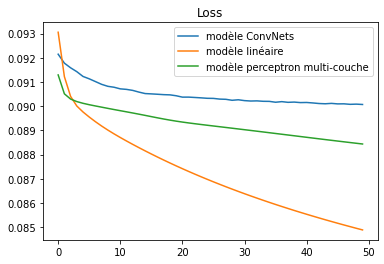

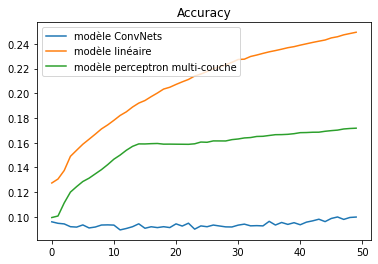

In [26]:
plot_all_logs(all_logs)
#batchsize=500
#learning_rate = 0.01

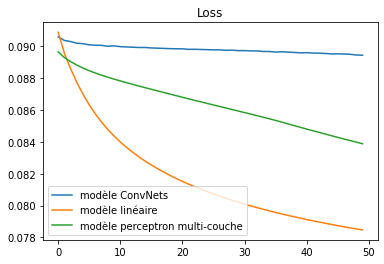

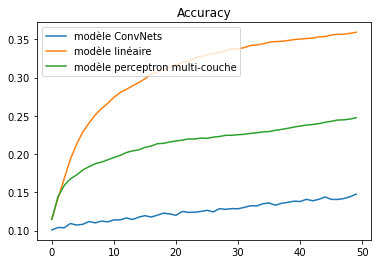

In [42]:
plot_all_logs(all_logs1)
#batchsize=500
#learning_rate = 0.03

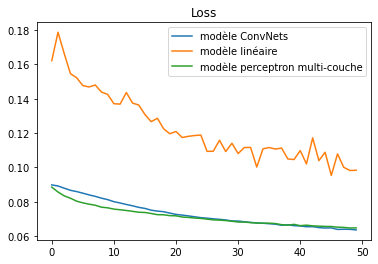

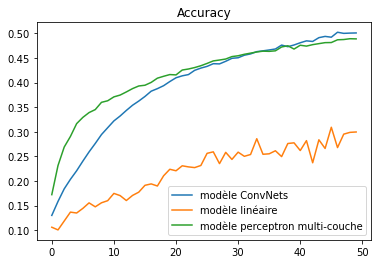

In [28]:
plot_all_logs(all_logs2)
#learning_rate = 1
#nbBatch=500

avec un learning_rate plus fort (ici 1)Nous remarquons que les résultats sont plus intéréssant.

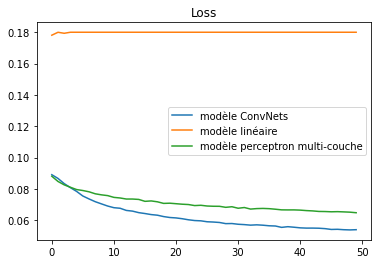

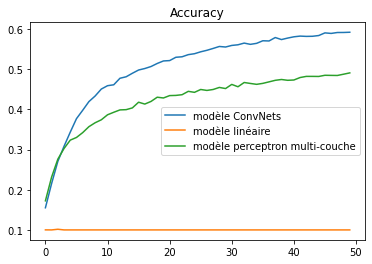

In [41]:
plot_all_logs(all_logs3)
#learning_rate = 5
#nbBatch = 500

avec un trop grand learning_rate, les courbes ont beaucoup de bruits

Suite aux observations faites ci-dessus, nous avons décidé de garder le learning_rate à 0.95

Maintenant nous allons faire varier le batch_size

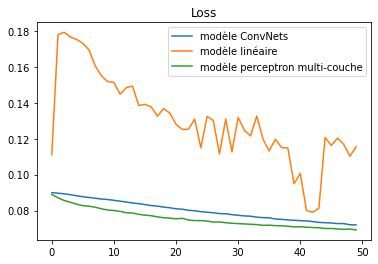

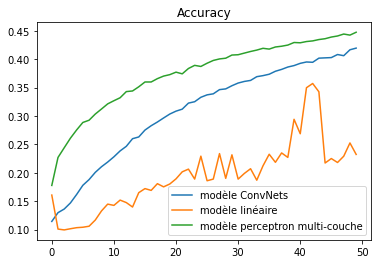

In [40]:
plot_all_logs(all_logs9) 
#learning_rate = 0.95
#Batch=1024

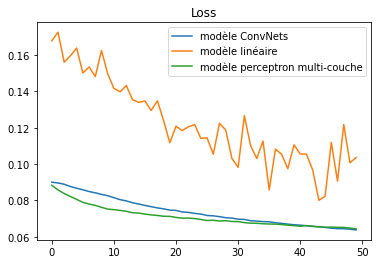

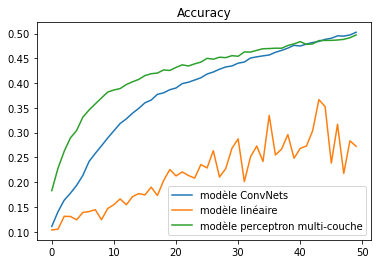

In [31]:
plot_all_logs(all_logs4) 
#learning_rate = 0.95
#nbBatch = 500

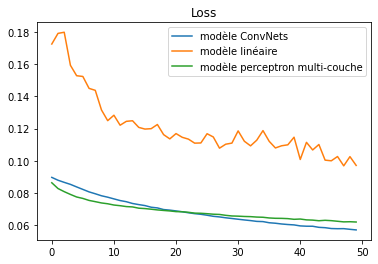

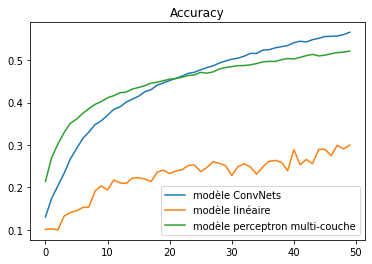

In [32]:
plot_all_logs(all_logs5) 
#learning_rate = 0.95
#nbBatch = 300

Nous observons qu'à partir d'un nbBatch <=300 les courbes des modèles ont une accuracy plus concluante.

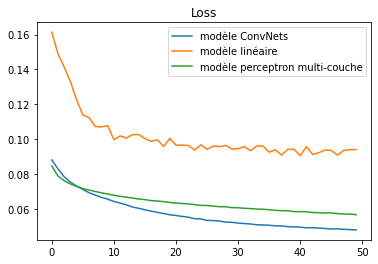

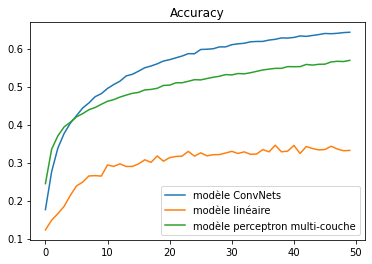

In [36]:
plot_all_logs(all_logs8) 
#learning_rate = 0.95
#nbBatch = 200

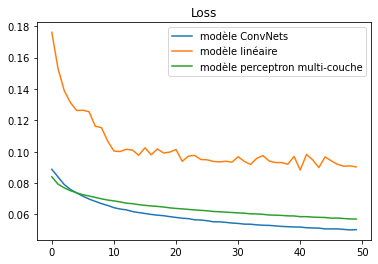

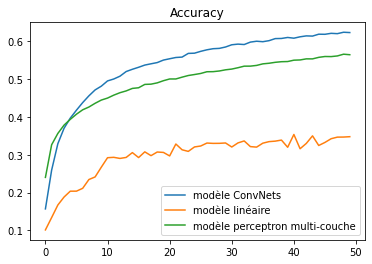

In [37]:
plot_all_logs(all_logs7) 
#learning_rate = 0.95
#nbBatch = 100

Nous observons que lorsque nous mettons un nbBatch =100 les modèles ont les résultats les plus concluants. Nous pouvons supposer que lorsque le batch_size est faible, l'accuracy du modèle est la meilleure.

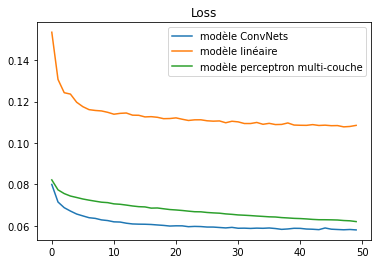

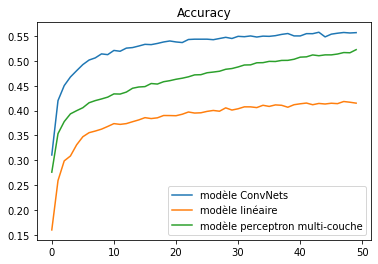

In [38]:
plot_all_logs(all_logs6) 
#learning_rate = 0.95
#nbBatch = 10

Contrairement à ce que nous supposions, nous remarquons qu'avec un batch_size très faible, les résultats diminuent.

En conclusion,
Grace aux différents exemples, nous pouvons en déduire que:

Le modèle linéaire a des résultats très décevant avec une accuracy en moyenne <30%

Le modèle PMC a des résultats assez décevant avec une accuracy en moyenne <50%

et enfin, le modèle Convnets a les résultats les plus intéressants avec une accuracy en moyenne >60%

De plus, le Loss du modèle Convnet et PMC atteint une valeur <0.06 lorsque le batch_size est compris entre 300 et 100 et le learning_rate =0.95